In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras import optimizers
from keras.layers import TimeDistributed
from time import time
from keras.callbacks import TensorBoard

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [68]:
from numpy.random import RandomState
import pandas as pd
df = pd.read_csv(r'./datasets_csv/avsr_test_data_kan_same_test_size_trainf_v1.csv')
df = df.fillna(0)
#rng = RandomState()
train = df
#test = df.sample(frac=0.3, random_state=rng)
print(train.shape)

(505, 234)


In [69]:
from numpy.random import RandomState
import pandas as pd
df1 = pd.read_csv(r'./datasets_csv/avsr_test_data_kan_same_test_size_testf_v1.csv')
df1 = df1.fillna(0)
#rng = RandomState()
#train = df.sample(frac=0.7, random_state=rng)
test = df1
print(test.shape)

(168, 234)


In [4]:
#train.shape

In [5]:
train_audio = train
test_audio = test

In [6]:
Y_Train = train['label']

In [7]:
Y_Test  = test['label']

In [8]:
Y_Test

0      3
1      1
2      2
3      6
4      2
      ..
163    0
164    5
165    5
166    6
167    3
Name: label, Length: 168, dtype: int64

In [9]:
X_train = train.drop(['label'], axis=1)

In [10]:
for x in range(40,233):
    X_train = X_train.drop([str(x)], axis=1)

In [11]:
X_test = test.drop(['label'], axis=1)

In [12]:
for x in range(40,233):
    X_test = X_test.drop([str(x)], axis=1)

In [13]:
X_train_audio = train.drop(['label'], axis=1)

In [14]:
for x in range(0,40):
    X_train_audio = X_train_audio.drop([str(x)], axis=1)

In [15]:
X_test_audio = test.drop(['label'], axis=1)

In [16]:
for x in range(0,40):
    X_test_audio = X_test_audio.drop([str(x)], axis=1)

In [17]:
v = np.array(X_train)

In [18]:
v=v.reshape(505*8,5)

In [19]:
v = np.array(v)
v=v.reshape(505,8,5)

In [20]:
X_train = v

In [21]:
v = np.array(X_test)
v=v.reshape(168*8,5)
v = pd.DataFrame(v)
#v.drop(v.columns[[11,12,13,14]],axis=1,inplace=True)
X_test = np.array(X_test)
X_test=v
X_test.shape

(1344, 5)

In [22]:
X_train = np.array(X_train)
X_train = X_train.reshape(505*8,5)

In [23]:
X_test = np.array(X_test)
X_test=X_test.reshape(168*8,5)

In [24]:
X_train[0]

array([1.36500001, 1.86099994, 1.51300001, 1.46200001, 1.38900006])

In [25]:
dat_fi=np.array([])
for a in range(4040):
    for b in range(5):
        if b==0:
            first =  X_train[a][b]
        else:
            second = X_train[a][b]
            ec = first - second
            dat_fi = np.append(dat_fi,ec,axis=None)
            first =second
            
dat_fj = np.array([])
for c in range(1344):
    for b in range(5):
        if b==0:
            first =  X_test[c][b]
        else:
            second = X_test[c][b]
            ec = first - second
            dat_fj = np.append(dat_fj,ec,axis=None)
            first =second

In [26]:
X_train = dat_fi.reshape(505,8,4)
X_test = dat_fj.reshape(168,8,4)

In [27]:
Y_train = np.array(Y_Train)
Y_test = np.array(Y_Test)

In [28]:
X_train_audio = np.array(X_train_audio)
X_test_audio = np.array(X_test_audio)

In [29]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
Y_train = lb_make.fit_transform(Y_train)
Y_test = lb_make.fit_transform(Y_test)

In [30]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train.shape


(505, 8)

In [95]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, BatchNormalization, concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

input_audio = Input(shape=(193,1))
input_video = Input(shape=(8,4))

conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(input_audio)
conv = MaxPooling1D(3)(conv)
conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
conv = Dropout(0.3)(conv)
conv = Flatten()(conv)
x = Dense(units=512, activation='relu')(conv)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x)
x1 = Dropout(0.4)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x1)
x1 = Dropout(0.5)(x1)
x1 = Dense(8, activation='relu')(x1)

y = LSTM(128,input_shape=(8,4),return_sequences=True,activation='relu')(input_video)

#y = Dense(512, activation='relu')(y)
y1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(y)
y1 = Dropout(0.4)(y1)
y1 = LSTM(256,activation='relu')(y1)
#y1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(y1)
y1 = Dropout(0.4)(y1)
y1 = Dense(512, activation='relu')(y1)

#y = Model(inputs=input_video, outputs=y)
y = Flatten()(y)
combined = Concatenate()([x, y])
z1 = Dense(512, activation="relu")(combined)
z1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(z1)
z1 = Dropout(0.4)(z1)
z1 = Dense(1024, activation="relu")(z1)
z1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(z1)
z1 = Dropout(0.4)(z1)
z1 = Dense(256, activation="relu")(z1)
combined1 = Concatenate()([x1, y1,z1]) 


z = Dense(512, activation="relu")(combined1)
z = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(z)
z = Dropout(0.4)(z)
z = Dense(1024, activation="relu")(z)
z = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(z)
z = Dropout(0.5)(z)
z = Dense(256, activation="relu")(z)
z = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(z)


z = Dense(8, activation='softmax')(z)
model = Model(inputs=[input_audio, input_video], outputs=z)
#model = Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 193, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 181, 8)       112         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 60, 8)        0           conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 60, 8)        32          max_pooling1d[0][0]              
______________________________________________________________________________________________

In [96]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

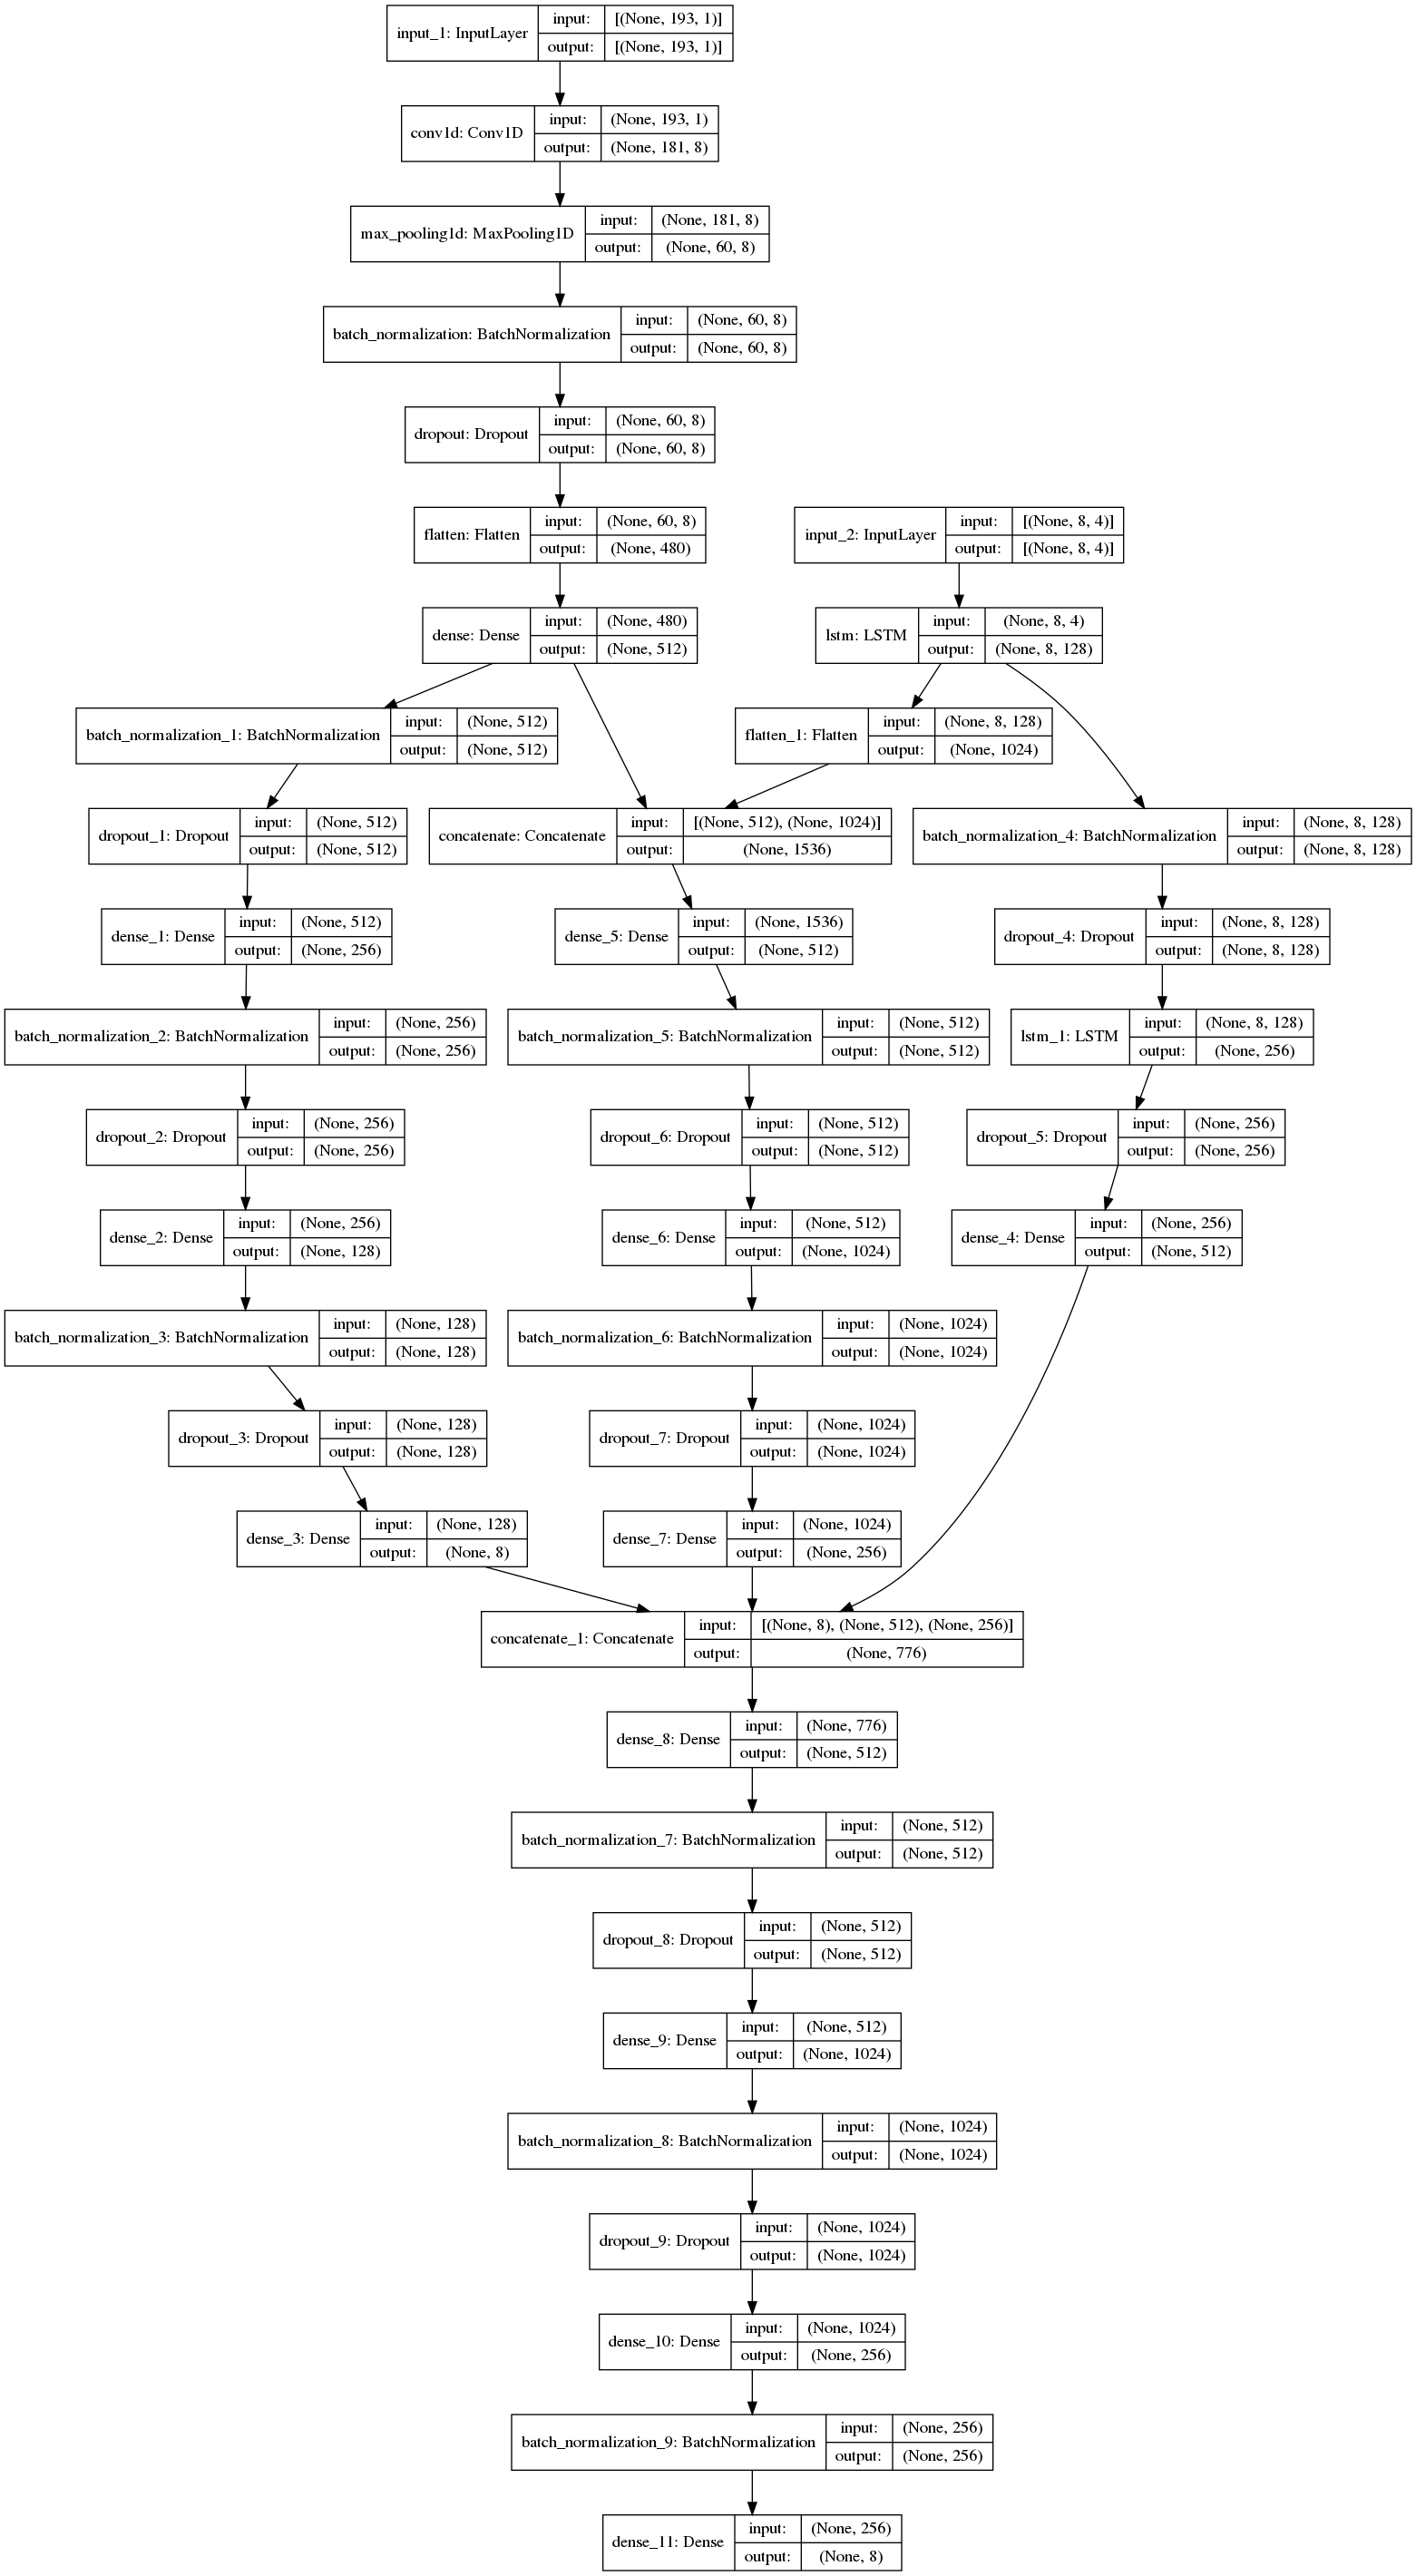

In [109]:
from keras.utils import plot_model
plot_model(model, to_file='AVSR_model_plot_Kannada.png', show_shapes=True, show_layer_names=True)

In [98]:
history = model.fit(x=[X_train_audio, X_train], y=Y_train, batch_size=32, epochs=100, verbose=1, validation_data=([X_test_audio,X_test],Y_test))

Epoch 1/100
16/16 [==============================] - 6s 101ms/step - loss: 2.8497 - accuracy: 0.1300 - val_loss: 2.0567 - val_accuracy: 0.1964
Epoch 2/100
16/16 [==============================] - 1s 62ms/step - loss: 2.6855 - accuracy: 0.1710 - val_loss: 2.0360 - val_accuracy: 0.2143
Epoch 3/100
16/16 [==============================] - 1s 73ms/step - loss: 2.6752 - accuracy: 0.2015 - val_loss: 2.0309 - val_accuracy: 0.2202
Epoch 4/100
16/16 [==============================] - 1s 68ms/step - loss: 2.4183 - accuracy: 0.2162 - val_loss: 1.9602 - val_accuracy: 0.3333
Epoch 5/100
16/16 [==============================] - 1s 63ms/step - loss: 2.2939 - accuracy: 0.2258 - val_loss: 1.9096 - val_accuracy: 0.2798
Epoch 6/100
16/16 [==============================] - 1s 71ms/step - loss: 2.2228 - accuracy: 0.2373 - val_loss: 1.9101 - val_accuracy: 0.2738
Epoch 7/100
16/16 [==============================] - 1s 68ms/step - loss: 2.2148 - accuracy: 0.2528 - val_loss: 1.8802 - val_accuracy: 0.2679
Epoch

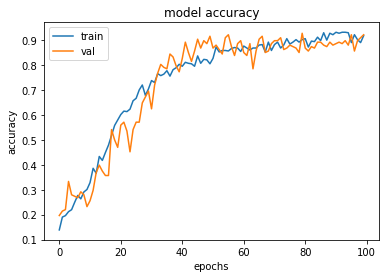

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('AVSR_Kannada Model Accuracy.jpg')
plt.show()

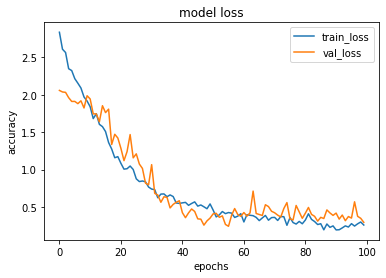

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.savefig('AVSR_Kannada Model Loss.jpg')
plt.show()

In [101]:
predict_prob=model.predict([X_test_audio,X_test])
predict_classes=np.argmax(predict_prob,axis=1)
predict_classes
score, acc = model.evaluate([X_test_audio,X_test], Y_test)

6/6 [==============================] - 0s 31ms/step - loss: 0.2952 - accuracy: 0.9226


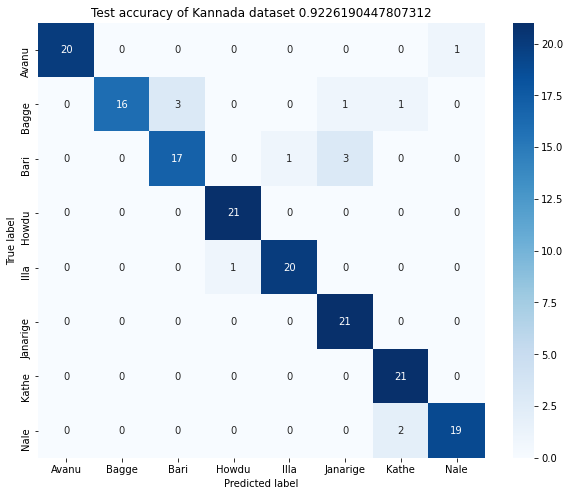

In [105]:
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
words_list = ['Avanu','Bagge','Bari', 'Howdu','Illa', 'Janarige', 'Kathe', 'Nale']
lb = LabelEncoder()
y_pred = lb_make.fit_transform(predict_classes)
Y_Test = lb_make.fit_transform(Y_Test)
cm = confusion_matrix(Y_Test, y_pred)
cm_df = pd.DataFrame(cm,index =words_list,columns = words_list)
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title('Test accuracy of Kannada dataset {}'.format(acc))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('AVSR_Kannada Confusion Matrix.jpg')
plt.show()

In [103]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_pred, target_names=words_list))

              precision    recall  f1-score   support

       Avanu       1.00      0.95      0.98        21
       Bagge       1.00      0.76      0.86        21
        Bari       0.85      0.81      0.83        21
       Howdu       0.95      1.00      0.98        21
        Illa       0.95      0.95      0.95        21
    Janarige       0.84      1.00      0.91        21
       Kathe       0.88      1.00      0.93        21
        Nale       0.95      0.90      0.93        21

    accuracy                           0.92       168
   macro avg       0.93      0.92      0.92       168
weighted avg       0.93      0.92      0.92       168



In [119]:
model.save('avsr_kannada_testsame_v2.h5')#creates a HDF5 file 'my_model.h5'
